# User_Behaviour_Dataset



# Introduction


This dataset is well-suited for analyzing mobile usage patterns, identifying user behavior trends, and exploring correlations between device characteristics  Key variables include app usage time, screen-on time, battery consumption, data usage, number of installed apps, and user characteristics such as age, gender, and device type.

# Importing Libaries 


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import data from a csv file

In [78]:
df=pd.read_csv(r"D:\data analytics\data set\user_behavior_dataset.csv")
print(df)
df.info()



     User ID        Device Model Operating System  App Usage Time (min/day)  \
0          1      Google Pixel 5          Android                       393   
1          2           OnePlus 9          Android                       268   
2          3        Xiaomi Mi 11          Android                       154   
3          4      Google Pixel 5          Android                       239   
4          5           iPhone 12              iOS                       187   
..       ...                 ...              ...                       ...   
695      696           iPhone 12              iOS                        92   
696      697        Xiaomi Mi 11          Android                       316   
697      698      Google Pixel 5          Android                        99   
698      699  Samsung Galaxy S21          Android                        62   
699      700           OnePlus 9          Android                       212   

     Screen On Time (hours/day)  Battery Drain (mAh

# Cleaning data

In [56]:
df=pd.read_csv(r"D:\data analytics\data set\user_behavior_dataset.csv")
df.dropna()


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


# Removing duplicates

In [57]:
df.drop_duplicates(inplace=True)
print(df.head())

   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                

# Plot boxplot for finding outliers

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'User ID'),
  Text(1, 0, 'App Usage Time (min/day)'),
  Text(2, 0, 'Screen On Time (hours/day)'),
  Text(3, 0, 'Battery Drain (mAh/day)'),
  Text(4, 0, 'Number of Apps Installed'),
  Text(5, 0, 'Data Usage (MB/day)'),
  Text(6, 0, 'Age'),
  Text(7, 0, 'User Behavior Class')])

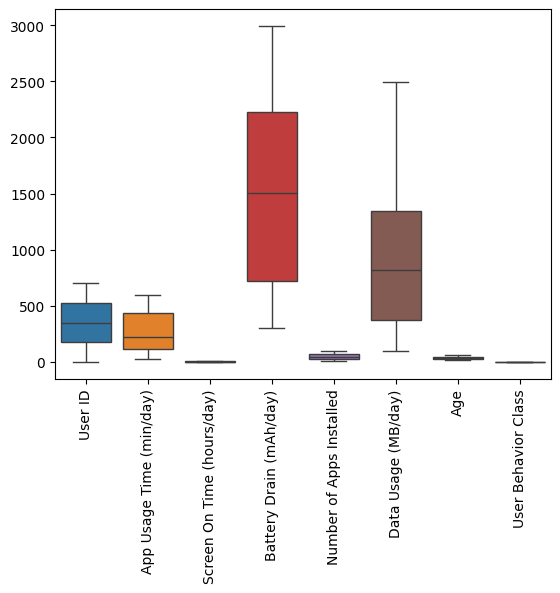

In [58]:
sns.boxplot(data=df)
plt.xticks(rotation=90)

# Find the correlation and plot heat map

                             User ID  App Usage Time (min/day)  \
User ID                     1.000000                 -0.024957   
App Usage Time (min/day)   -0.024957                  1.000000   
Screen On Time (hours/day) -0.014287                  0.950333   
Battery Drain (mAh/day)    -0.019377                  0.956385   
Number of Apps Installed   -0.023914                  0.955253   
Data Usage (MB/day)        -0.014527                  0.942308   
Age                         0.045188                  0.004382   
User Behavior Class        -0.016242                  0.970498   

                            Screen On Time (hours/day)  \
User ID                                      -0.014287   
App Usage Time (min/day)                      0.950333   
Screen On Time (hours/day)                    1.000000   
Battery Drain (mAh/day)                       0.948983   
Number of Apps Installed                      0.946975   
Data Usage (MB/day)                           0.941322   

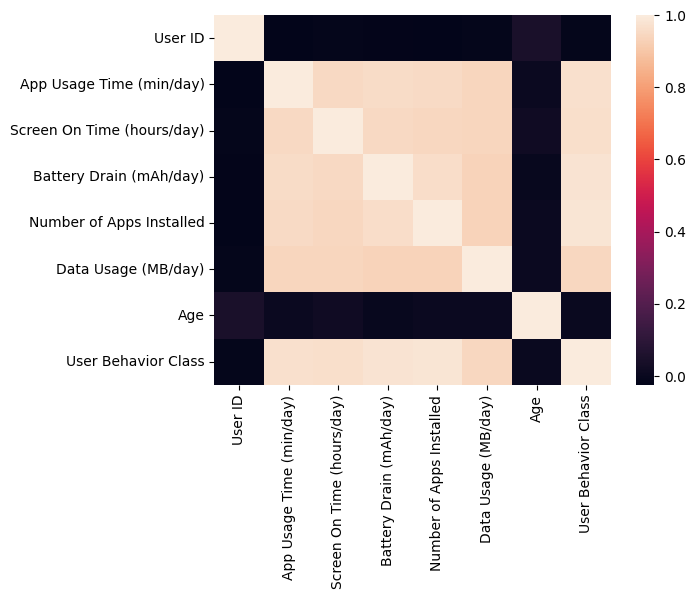

In [65]:
corr=df.corr(numeric_only=True)
print(corr)
sns.heatmap(corr)
plt.show()

# Which operating system has the highest average app usage time?

Operating System
Android    268.258123
iOS        282.020548
Name: App Usage Time (min/day), dtype: float64


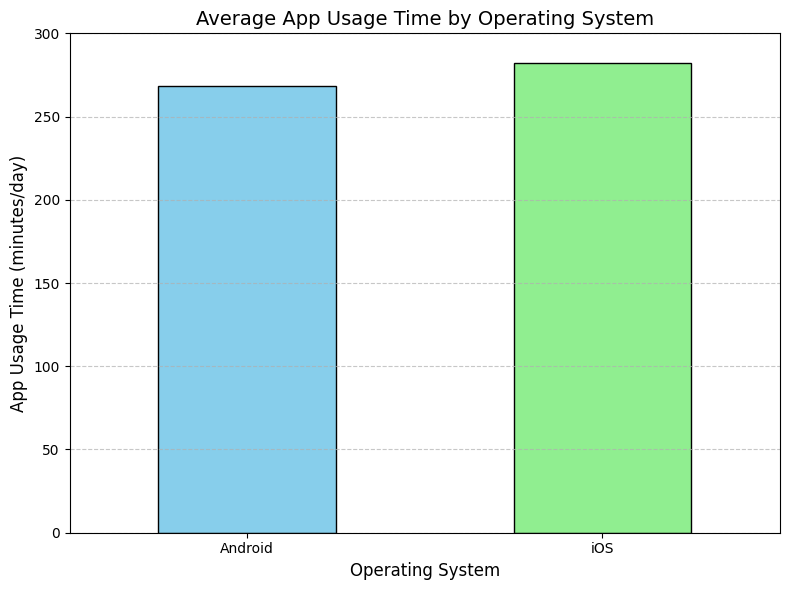

In [ ]:
app= df.groupby("Operating System")["App Usage Time (min/day)"].mean()
highest_avg_os = app.idxmax()
highest_avg_time =app.max()
print(app)
plt.figure(figsize=(8, 6))
app.plot(kind='bar', color=['skyblue', 'lightgreen'], edgecolor='black')
plt.title('Average App Usage Time by Operating System', fontsize=14)
plt.ylabel('App Usage Time (minutes/day)', fontsize=12)
plt.xlabel('Operating System', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 300)
plt.tight_layout()
plt.show()



# How does age correlate with app usage, battery consumption, and data usage?

     App Usage Time (min/day)  Battery Drain (mAh/day)  Data Usage (MB/day)
Age                                                                        
18                 264.272727              1650.818182           998.454545
19                 248.583333              1461.916667           875.333333
20                 282.764706              1698.000000          1033.117647
21                 332.352941              1853.882353          1159.705882
22                 344.708333              1806.583333          1133.291667
23                 282.533333              1484.133333           887.400000
24                 278.857143              1556.500000           867.928571
25                 238.000000              1436.047619           786.904762
26                 216.500000              1212.285714           839.428571
27                 251.958333              1432.375000           864.583333
28                 249.076923              1445.846154           827.384615
29          

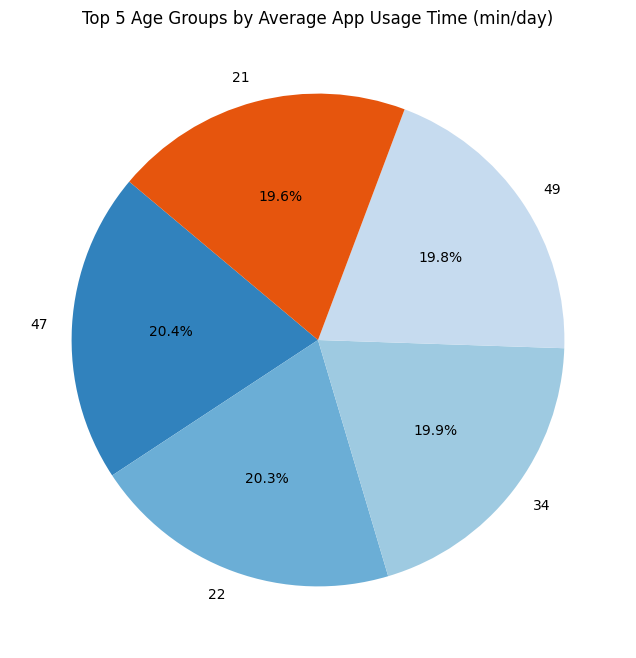

In [75]:
correlation = df[['Age', 'App Usage Time (min/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)']].corr()
age_correlations = correlation.loc['Age']
age_correlations
average_metrics = df.groupby('Age')[
    ['App Usage Time (min/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)']
].mean()
print(average_metrics)
top_ages = average_metrics.sort_values('App Usage Time (min/day)', ascending=False).head()
plt.figure(figsize=(8, 8))
plt.pie(
    top_ages['App Usage Time (min/day)'],
    labels=top_ages.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20c.colors
)
plt.title('Top 5 Age Groups by Average App Usage Time (min/day)')
plt.show()

# What are the average app usage time and screen-on time for different age groups or genders?

In [ ]:
avg = df.groupby(['Age', 'Gender'])[
    ['App Usage Time (min/day)', 'Screen On Time (hours/day)']
].mean()
avg.reset_index()






,Age,Gender,App Usage Time (min/day),Screen On Time (hours/day)
0,18,Male,264.272727,5.490909
1,19,Female,268.428571,4.957143
2,19,Male,220.800000,4.460000
3,20,Female,241.700000,4.800000
4,20,Male,341.428571,6.614286
...,...,...,...,...
78,57,Male,343.600000,7.060000
79,58,Female,191.400000,3.600000
80,58,Male,259.111111,4.911111
81,59,Female,342.000000,6.900000


# How does app usage time vary between Android and iOS devices?

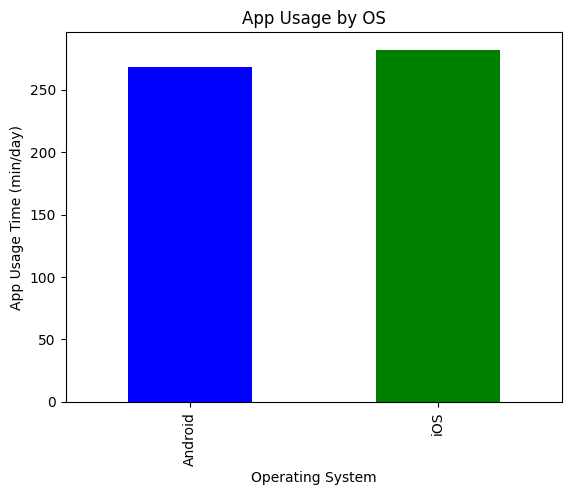

In [ ]:
average_usage_by_os = df.groupby('Operating System')['App Usage Time (min/day)'].mean()
average_usage_by_os.reset_index()
average_usage_by_os.plot(kind='bar', color=['blue', 'green'], title="App Usage by OS")
plt.ylabel("App Usage Time (min/day)")
plt.show()

# How does the number of apps installed relate to user behavior classes?

In [ ]:
average_usage_by_os = df.groupby('Operating System')['App Usage Time (min/day)'].mean()
average_usage_by_os


Operating System
Android    268.258123
iOS        282.020548
Name: App Usage Time (min/day), dtype: float64

# Which group ,by age, gender, or device type shows the highest variability in their usage patterns?

App Usage Time (min/day)      221.506832
Screen On Time (hours/day)      3.976042
dtype: float64 App Usage Time (min/day)      183.494064
Screen On Time (hours/day)      3.148084
dtype: float64 App Usage Time (min/day)      180.130832
Screen On Time (hours/day)      3.152046
dtype: float64


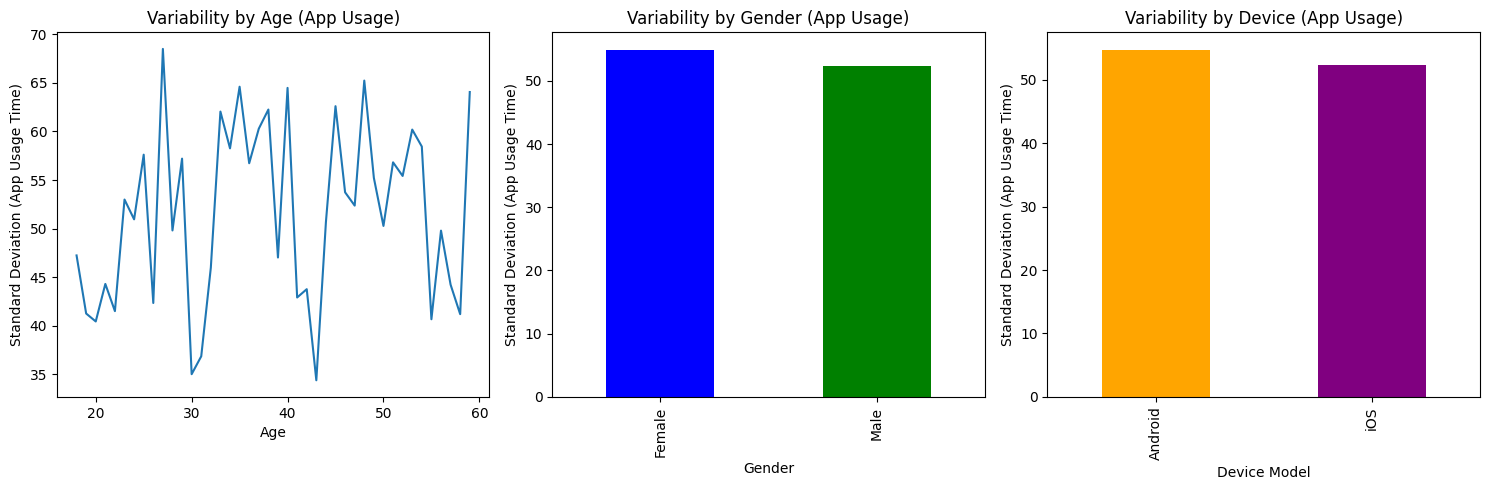

In [ ]:
age = df.groupby('Age')[['App Usage Time (min/day)', 'Screen On Time (hours/day)']].std()
gender = df.groupby('Gender')[['App Usage Time (min/day)', 'Screen On Time (hours/day)']].std()
device = df.groupby('Device Model')[['App Usage Time (min/day)', 'Screen On Time (hours/day)']].std()
max_age = age.max()
max_gender = gender.max()
max_device=device.max()
print(max_age,max_device,max_gender)
age = data.groupby('Age')[['App Usage Time (min/day)', 'Screen On Time (hours/day)']].std()
gender = data.groupby('Gender')[['App Usage Time (min/day)', 'Screen On Time (hours/day)']].std()
device = data.groupby('Device Model')[['App Usage Time (min/day)', 'Screen On Time (hours/day)']].std()
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
age['App Usage Time (min/day)'].plot(kind='line', title="Variability by Age (App Usage)")
plt.xlabel('Age')
plt.ylabel('Standard Deviation (App Usage Time)')
plt.subplot(1, 3, 2)
gender['App Usage Time (min/day)'].plot(kind='bar', color=['blue', 'green'], title="Variability by Gender (App Usage)")
plt.xlabel('Gender')
plt.ylabel('Standard Deviation (App Usage Time)')
plt.subplot(1, 3, 3)
device['App Usage Time (min/day)'].plot(kind='bar', color=['orange', 'purple'], title="Variability by Device (App Usage)")
plt.xlabel('Device Model')
plt.ylabel('Standard Deviation (App Usage Time)')

plt.tight_layout()
plt.show()



# How do high-battery-drain users differ in other metrics compared to low-battery-drain users?

                     App Usage Time (min/day)  Screen On Time (hours/day)  \
Battery Drain Group                                                         
High                               417.474286                    7.744000   
Low                                124.782857                    2.801429   

                     Data Usage (MB/day)  
Battery Drain Group                       
High                         1428.142857  
Low                           431.342857  


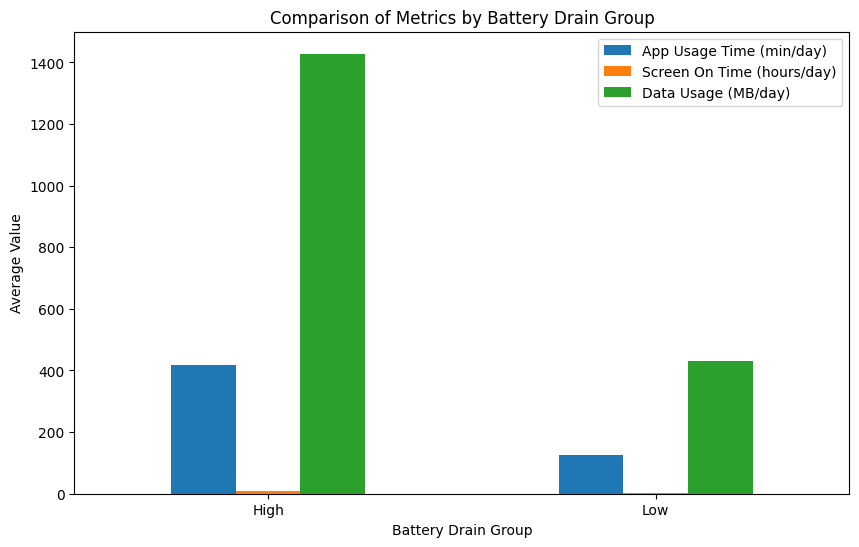

In [ ]:
median_battery_drain = df['Battery Drain (mAh/day)'].median()
df['Battery Drain Group'] = ['High' if x > median_battery_drain else 'Low' for x in df['Battery Drain (mAh/day)']]
grouped_metrics = df.groupby('Battery Drain Group')[
    ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Data Usage (MB/day)']
].mean()
print(grouped_metrics)
grouped_metrics.plot(kind='bar', figsize=(10, 6), title="Comparison of Metrics by Battery Drain Group")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.show()



# How does the number of apps installed relate to user behavior classes?

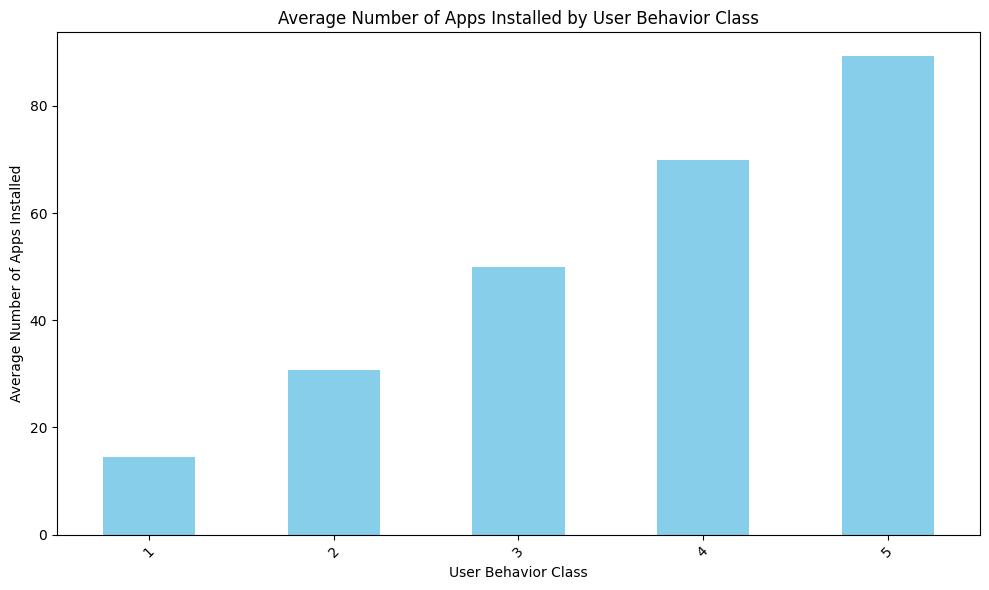

In [ ]:

average_apps = df.groupby('User Behavior Class')['Number of Apps Installed'].mean()
plt.figure(figsize=(10, 6))
average_apps.plot(kind='bar', color='skyblue', title="Average Number of Apps Installed by User Behavior Class")
plt.xlabel('User Behavior Class')
plt.ylabel('Average Number of Apps Installed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Which device models are associated with the highest battery drain?

Device Model
iPhone 12             1589.513699
Xiaomi Mi 11          1528.876712
OnePlus 9             1523.849624
Samsung Galaxy S21    1504.571429
Google Pixel 5        1475.676056
Name: Battery Drain (mAh/day), dtype: float64


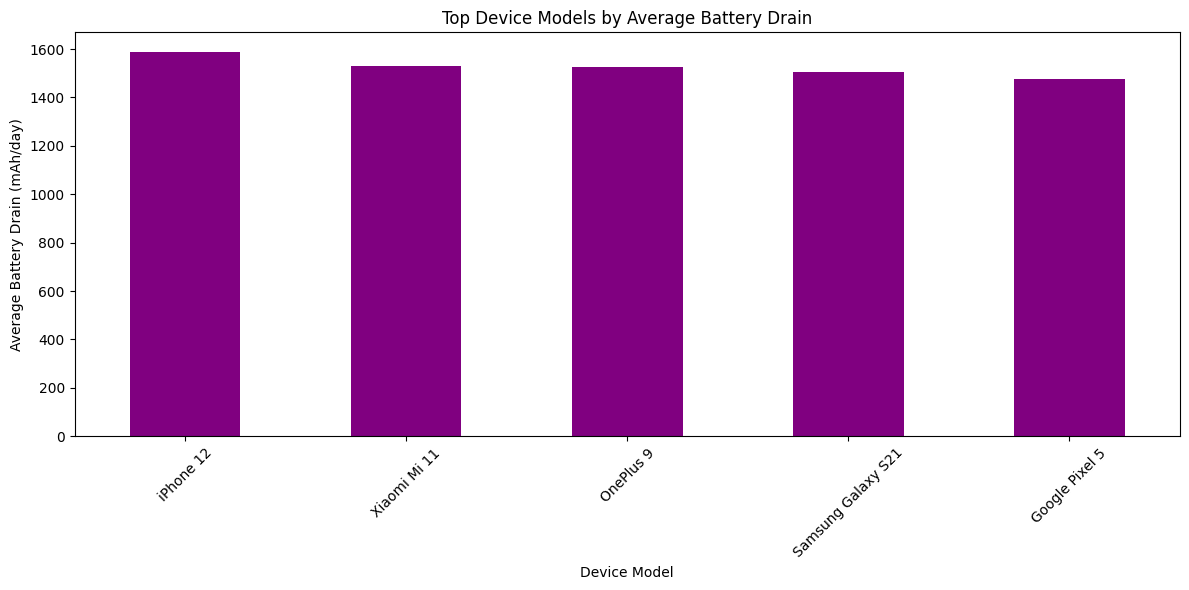

In [ ]:
average_battery_drain = df.groupby('Device Model')['Battery Drain (mAh/day)'].mean()
battery_drain_devices = average_battery_drain.sort_values(ascending=False).head(10)
print(battery_drain_devices)
plt.figure(figsize=(12, 6))
battery_drain_devices.plot(kind='bar', color='purple', title="Top Device Models by Average Battery Drain")
plt.xlabel('Device Model')
plt.ylabel('Average Battery Drain (mAh/day)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Are Android users significantly different from iOS users in terms of data usage and app time?



                  Data Usage (MB/day)  App Usage Time (min/day)
Operating System                                               
Android                    920.317690                268.258123
iOS                        965.506849                282.020548


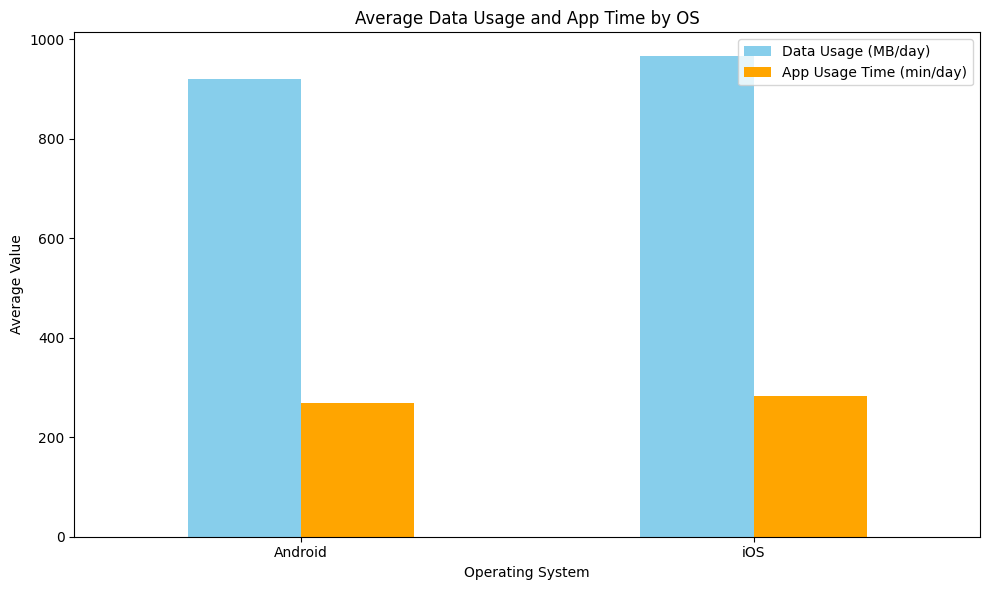

In [ ]:
average_metrics_by_os = df.groupby('Operating System')[
    ['Data Usage (MB/day)', 'App Usage Time (min/day)']
].mean()
print(average_metrics_by_os)
average_metrics_by_os.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'], title="Average Data Usage and App Time by OS")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Which device models are most popular among specific age groups or genders?

Device Model  Android  iOS
Age                       
18                  6    3
19                  8    6
20                  6    6
21                  8    4
22                  4    5
23                 10    8
24                 13    9
25                  9   11
26                 11    5
27                  9    6
28                  9   13
29                 12    7
30                  6    8
31                  8    9
32                  4   12
33                  9    5
34                 10   11
35                 11   10
36                  7   11
37                  5   11
38                  7    7
39                  8    6
40                  9    9
41                  8    7
42                  8   12
43                  2   11
44                  6    9
45                  8   12
46                 11   11
47                  6    7
48                  7    9
49                  9    7
50                  9   11
51                 10   10
52                 10    6
5

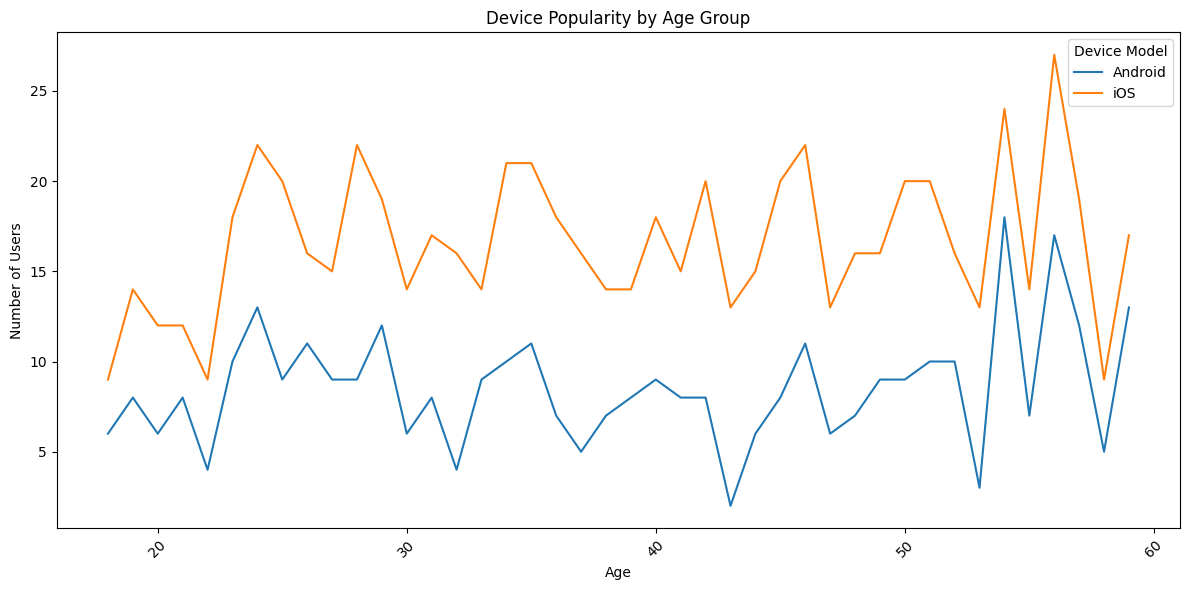

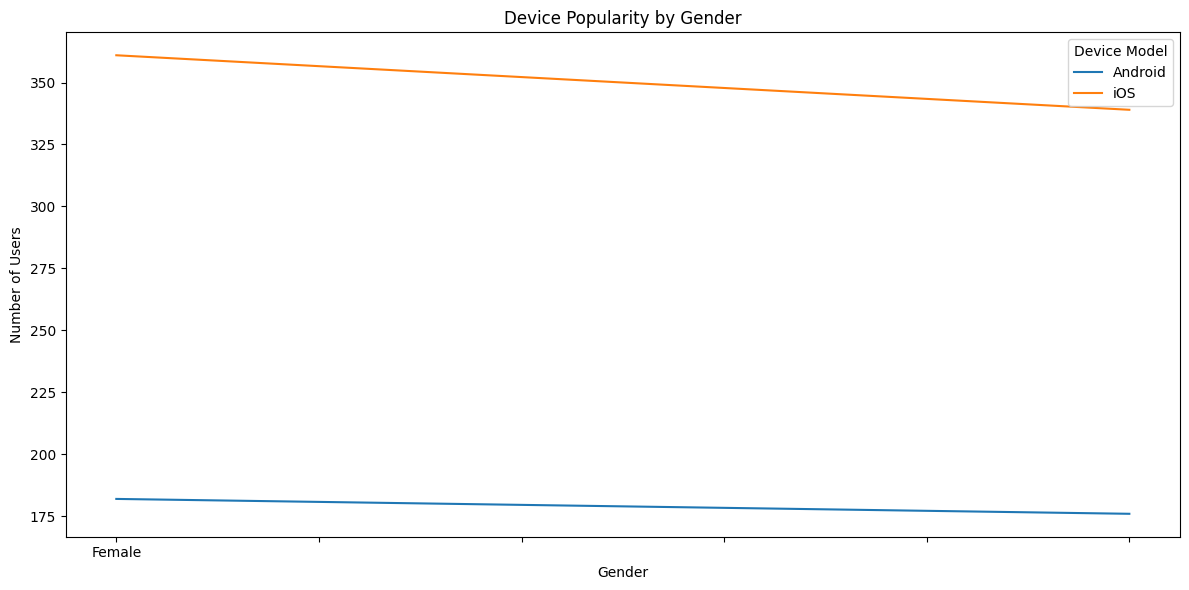

In [ ]:
popularity_by_age = data.groupby(['Age', 'Device Model']).size().unstack(fill_value=0)
popularity_by_gender = data.groupby(['Gender', 'Device Model']).size().unstack(fill_value=0)
print(popularity_by_age,popularity_by_gender)
popularity_by_age.plot(kind='line', stacked=True, figsize=(12, 6), title="Device Popularity by Age Group")
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
popularity_by_gender.plot(kind='line', stacked=True, figsize=(12, 6), title="Device Popularity by Gender")
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()




# Is there a relationship between the number of installed apps and daily app usage time?

In [73]:
correlation = df['Number of Apps Installed'].corr(data['App Usage Time (min/day)'])
print(f"Correlation between number of installed apps and daily app usage time: {correlation}")




Correlation between number of installed apps and daily app usage time: -0.0017576544426209997


# Summarizing Data

In [74]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


# Summary

The exploratory data analysis (EDA) starts with a basic examination of the dataset, including its datacleaning, removing duplicates, and finding outliers.Then check the average values for things like app usage and battery drain. Also look at how common each device model or gender is in the data.Next founded how number app installed related to usage time and other behaviours using visual tools like graphs. and analysed device model popular among age group and genders.Finally,summarize the data